In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
df.shape

(4009, 12)

In [6]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [9]:
df['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,3309
Hybrid,194
E85 Flex Fuel,139
Diesel,116
–,45
Plug-In Hybrid,34
not supported,2


In [10]:
df["fuel_type"].fillna("not supported",inplace=True)
df["fuel_type"].replace({"–":"not supported"},inplace=True)

In [11]:
df["clean_title"].value_counts()

,count
clean_title,
Yes,3413


In [12]:
df["clean_title"].fillna('No',inplace=True)
df["clean_title"].value_counts()

,count
clean_title,
Yes,3413
No,596


In [13]:
df["accident"].value_counts()

,count
accident,
None reported,2910
At least 1 accident or damage reported,986


In [14]:
mode_value = df["accident"].mode()[0]
df["accident"].fillna(value=mode_value,inplace=True)
df["accident"].value_counts()

,count
accident,
None reported,3023
At least 1 accident or damage reported,986


In [15]:
df["milage"] = df["milage"].astype(str)
df["milage"] = df["milage"].str.replace(" mi.","")
df["milage"] = df["milage"].str.replace(",","")
df["milage"] = df["milage"].astype(float)
df["milage"]

,milage
0,51000.0
1,34742.0
2,22372.0
3,88900.0
4,9835.0
...,...
4004,714.0
4005,10900.0
4006,2116.0
4007,33000.0


In [16]:
df["price"] = df["price"].astype(str)
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")
df["price"] = df["price"].astype(float)
df["price"]

,price
0,10300.0
1,38005.0
2,54598.0
3,15500.0
4,34999.0
...,...
4004,349950.0
4005,53900.0
4006,90998.0
4007,62999.0


In [17]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [19]:
import datetime
now_date = datetime.datetime.now()
df["Age"] = now_date.year - df["model_year"]
df["Age"]= df["Age"] + 1


In [20]:
df["Age"].value_counts()

,count
Age,
4,354
5,350
6,322
8,315
7,297
10,268
9,259
11,228
3,226


In [21]:
df.drop("model_year",axis=1,inplace=True)

In [22]:
df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,13
1,Hyundai,Palisade SEL,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,5
2,Lexus,RX 350 RX 350,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598.0,4
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,11
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999.0,5


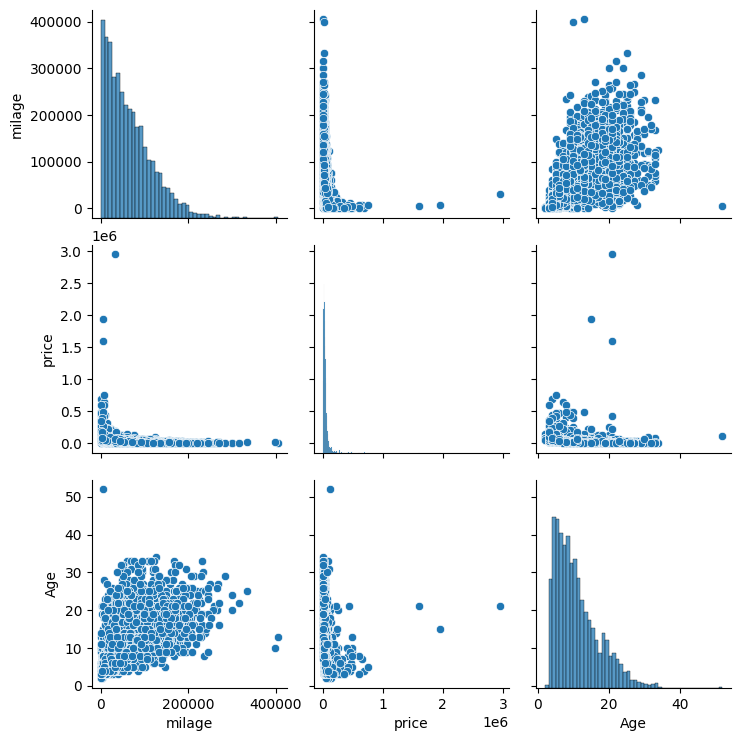

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df['price'] = np.log10(df['price'])


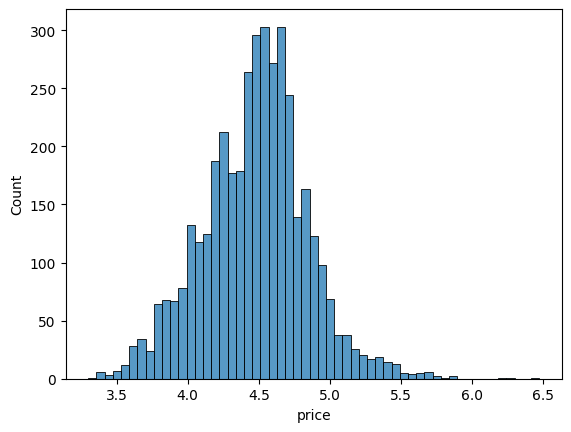

In [25]:
sns.histplot(df['price'])
plt.show()

In [26]:
df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,4.012837,13
1,Hyundai,Palisade SEL,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,4.579841,5
2,Lexus,RX 350 RX 350,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,4.737177,4
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,4.190332,11
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,4.544056,5


In [27]:
df["model"].value_counts()

,count
model,
M3 Base,30
F-150 XLT,24
Corvette Base,22
1500 Laramie,18
Camaro 2SS,17
...,...
Mazda6 Signature,1
SLK-Class SLK320,1
Protege DX,1


In [28]:
df["transmission"].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [29]:

transmission_mapping = {
    '6-Speed A/T': 'Automatic',
    '8-Speed Automatic': 'Automatic',
    'Automatic': 'Automatic',
    '7-Speed A/T': 'Automatic',
    'A/T': 'Automatic',
    '8-Speed A/T': 'Automatic',
    'Transmission w/Dual Shift Mode': 'Automatic',
    '9-Speed Automatic': 'Automatic',
    '10-Speed Automatic': 'Automatic',
    'Automatic CVT': 'CVT',
    'CVT Transmission': 'CVT',
    'CVT-F': 'CVT',
    '7-Speed Automatic': 'Automatic',
    '6-Speed M/T': 'Manual',
    '7-Speed M/T': 'Manual',
    '6-Speed Manual': 'Manual',
    '5-Speed M/T': 'Manual',
    'Manual': 'Manual',
    '7-Speed Manual': 'Manual',
    '8-Speed Manual': 'Manual',
    'M/T': 'Manual',
    '6-Speed Automatic with Auto-Shift': 'Automatic',
    '8-Speed Automatic with Auto-Shift': 'Automatic',
    '9-Speed Automatic with Auto-Shift': 'Automatic',
    '5-Speed Automatic': 'Automatic',
    '4-Speed A/T': 'Automatic',
    '4-Speed Automatic': 'Automatic',
    '10-Speed A/T': 'Automatic',
    '5-Speed A/T': 'Automatic',
    '1-Speed A/T': 'Automatic',
    '2-Speed Automatic': 'Automatic',
    '6-Speed Electronically Controlled Automatic with O': 'Automatic',
    'Single-Speed Fixed Gear': 'Automatic',
    '7-Speed DCT Automatic': 'Automatic',
    '8-SPEED AT': 'Automatic',
    '8-SPEED A/T': 'Automatic',
    '10-Speed Automatic with Overdrive': 'Automatic',
    'Automatic, 9-Spd 9G-Tronic': 'Automatic',
    'Automatic, 8-Spd': 'Automatic',
    'Automatic, 8-Spd Sport w/Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd PDK Dual-Clutch': 'Automatic',
    'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd Dual-Clutch': 'Automatic',
    '2-Speed A/T': 'Automatic',
    '6 Speed At/Mt': 'Manual',
    '6 Speed Mt': 'Manual',
    'Variable': 'Other',
    '2': 'Other',
    '–': 'Other',
    'SCHEDULED FOR OR IN PRODUCTION': 'Other'
}


df['transmission'] = df['transmission'].replace(transmission_mapping)

df['transmission'].value_counts()


,count
transmission,
Automatic,3324
Manual,372
CVT,100
9-Speed A/T,74
6-Speed Automatic,73
7-Speed Automatic with Auto-Shift,24
1-Speed Automatic,14
Other,12
Transmission Overdrive Switch,7


In [30]:

def simplify_transmission(transmission):
    if 'Automatic' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission:
        return 'Manual'
    else:
        return 'Other'


df['transmission'] = df['transmission'].apply(simplify_transmission)


df['transmission'].value_counts()


,count
transmission,
Automatic,3437
Manual,374
Other,198


In [31]:
df["engine"].unique()

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC', ...,
       '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel'], dtype=object)

In [32]:
df["engine"].value_counts()

,count
engine,
2.0L I4 16V GDI DOHC Turbo,52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,47
–,45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel,44
...,...
305.0HP 6.8L 10 Cylinder Engine Gasoline Fuel,1
562.0HP 5.2L 10 Cylinder Engine Gasoline Fuel,1
245.0HP 5.9L Straight 6 Cylinder Engine Diesel Fuel,1


In [33]:
import re

def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''


df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [34]:
df.drop('engine',axis=1,inplace=True)

In [35]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,Horsepower,Engine_Displacement
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,4.012837,13,300.0,3.7L
1,Hyundai,Palisade SEL,34742.0,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,4.579841,5,None,3.8L
2,Lexus,RX 350 RX 350,22372.0,Gasoline,Automatic,Blue,Black,None reported,No,4.737177,4,None,3.5 Liter
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,Automatic,Black,Black,None reported,Yes,4.190332,11,354.0,3.5L
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,Automatic,Glacier White Metallic,Black,None reported,No,4.544056,5,None,2.0L


In [36]:
df['Horsepower'].isna().sum()

np.int64(707)

In [37]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')
df['Horsepower'].dtype

dtype('float64')

In [38]:
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace = True)
df['Horsepower'].isnull().sum()

np.int64(0)

In [39]:
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')

In [40]:
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'], errors = 'coerce')

In [41]:
df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean(), inplace = True)
df['Engine_Displacement'].isnull().sum()

np.int64(0)

In [42]:
df.drop("model",axis=1,inplace=True)

In [43]:
df.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,Horsepower,Engine_Displacement
0,Ford,51000.0,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,4.012837,13,300.000000,3.700000
1,Hyundai,34742.0,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,4.579841,5,332.283839,3.800000
2,Lexus,22372.0,Gasoline,Automatic,Blue,Black,None reported,No,4.737177,4,332.283839,3.710836
3,INFINITI,88900.0,Hybrid,Automatic,Black,Black,None reported,Yes,4.190332,11,354.000000,3.500000
4,Audi,9835.0,Gasoline,Automatic,Glacier White Metallic,Black,None reported,No,4.544056,5,332.283839,2.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                4009 non-null   object 
 1   milage               4009 non-null   float64
 2   fuel_type            4009 non-null   object 
 3   transmission         4009 non-null   object 
 4   ext_col              4009 non-null   object 
 5   int_col              4009 non-null   object 
 6   accident             4009 non-null   object 
 7   clean_title          4009 non-null   object 
 8   price                4009 non-null   float64
 9   Age                  4009 non-null   int64  
 10  Horsepower           4009 non-null   float64
 11  Engine_Displacement  4009 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 376.0+ KB


In [45]:
df["ext_col"].value_counts()

,count
ext_col,
Black,905
White,816
Gray,496
Silver,374
Blue,349
...,...
Pristine White,1
Garnet Red Metallic,1
Cayenne Red Tintcoat,1


In [46]:
df["ext_col"].unique()

array(['Black', 'Moonlight Cloud', 'Blue', 'Glacier White Metallic',
       'Silver', 'Green', 'Fuji White', 'Yellow', 'White', 'Gray',
       'Purple', 'Iconic Silver Metallic', 'Mythos Black Metallic', 'Red',
       'Gold', 'Lunar Silver Metallic', 'Mountain Air Metallic',
       'Caspian Blue', 'Tango Red Metallic', '–', 'Alpine White',
       'BLU ELEOS', 'Horizon Blue', 'Granite Crystal Clearcoat Metallic',
       'Orange', 'Beige', 'Rift Metallic', 'Atomic Silver',
       'Summit White', 'Imperial Blue Metallic',
       'Magnetic Gray Clearcoat', 'Bright White Clearcoat',
       'Typhoon Gray', 'Crystal Black Silica', 'Arctic Gray Metallic',
       'Selenite Grey Metallic', 'Ultra Black', 'Lunare White Metallic',
       'Hyper Red', 'Daytona Gray Pearl Effect', 'Vik Black',
       'Pacific Blue Metallic', 'Obsidian Black Metallic',
       'Silver Ice Metallic', 'Sonic Silver Metallic', 'Nightfall Mica',
       'Apex Blue', 'Go Mango!', 'Ingot Silver Metallic',
       'Midnight Bl

In [47]:
df["int_col"].value_counts()

,count
int_col,
Black,2025
Beige,538
Gray,472
Brown,157
–,133
...,...
Gray w/Blue Bolsters,1
Very Light Cashmere,1
Black / Gray,1


In [48]:
df["int_col"].unique()

array(['Black', 'Gray', 'Ebony.', 'Green', 'Pimento / Ebony', 'Brown',
       'White', '–', 'Beige', 'Jet Black', 'Light Gray', 'Anthracite',
       'Red', 'Nero Ade', 'Blue', 'Charcoal', 'Rioja Red',
       'Canberra Beige/Black', 'Roast', 'Ivory / Ebony',
       'Silk Beige/Black', 'Medium Pewter', 'Ice', 'Black / Express Red',
       'Obsidian Black', 'Ebony', 'Orange', 'Caramel', 'Orchid',
       'Graphite', 'Tan/Ebony', 'Cappuccino', 'Nero', 'Sahara Tan',
       'BLACK', 'Hotspur', 'Blk', 'Black Onyx', 'Nougat Brown',
       'Titan Black', 'Oyster W/Contrast', 'Silver',
       'Macchiato Beige/Black', 'Sand Beige', 'Navy Pier', 'WHITE',
       'Parchment.', 'Sarder Brown', 'Grace White', 'Cloud', 'Espresso',
       'Mesa', 'Whisper Beige', 'Medium Dark Slate', 'Gold',
       'Camel Leather', 'Tupelo', 'Black/Red', 'Parchment', 'Beluga Hide',
       'Charles Blue', 'Global Black', 'Titan Black / Quarzit', 'Mocha',
       'Portland', 'Medium Light Camel', 'Black / Saddle', 'Ash',
  

In [49]:
def extract_base_colors(df):

    base_colors = [
        'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
         'orange', 'yellow']

    # Convert columns to lowercase for consistency
    df['int_col'] = df['int_col'].str.lower()
    df['ext_col'] = df['ext_col'].str.lower()

    # Function to find base color or label it as 'other'
    def find_base_color(text):
        for color in base_colors:
            if color in text:
                return color
        return 'other'  # If no base color is found, return 'other'

    # Apply the function to both interior and exterior color columns
    df['int_col'] = df['int_col'].apply(find_base_color)
    df['ext_col'] = df['ext_col'].apply(find_base_color)

    return df


df = extract_base_colors(df)


df[['int_col', 'ext_col']].head()


,int_col,ext_col
0,black,black
1,gray,other
2,black,blue
3,black,black
4,black,white


In [50]:
df["int_col"].value_counts()

,count
int_col,
black,2155
other,862
gray,483
brown,163
red,134
white,131
blue,32
orange,23
silver,16


In [51]:
df.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,Horsepower,Engine_Displacement
0,Ford,51000.0,E85 Flex Fuel,Automatic,black,black,At least 1 accident or damage reported,Yes,4.012837,13,300.000000,3.700000
1,Hyundai,34742.0,Gasoline,Automatic,other,gray,At least 1 accident or damage reported,Yes,4.579841,5,332.283839,3.800000
2,Lexus,22372.0,Gasoline,Automatic,blue,black,None reported,No,4.737177,4,332.283839,3.710836
3,INFINITI,88900.0,Hybrid,Automatic,black,black,None reported,Yes,4.190332,11,354.000000,3.500000
4,Audi,9835.0,Gasoline,Automatic,white,black,None reported,No,4.544056,5,332.283839,2.000000


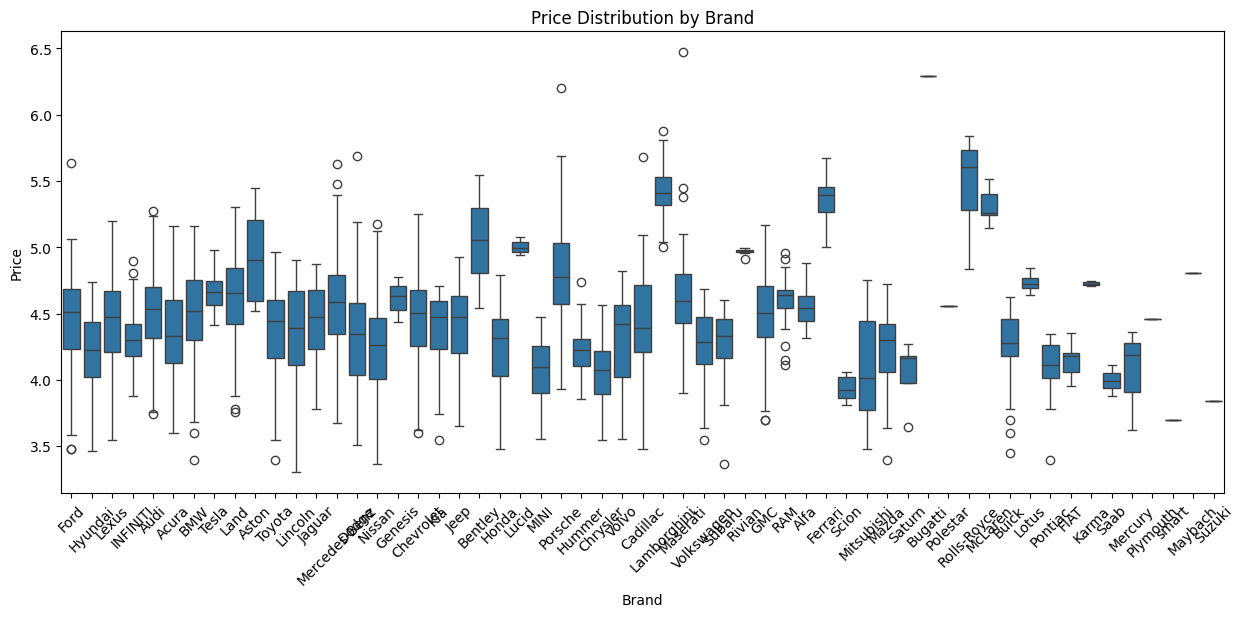

In [52]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df,x="brand",y="price")
plt.title("Price Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

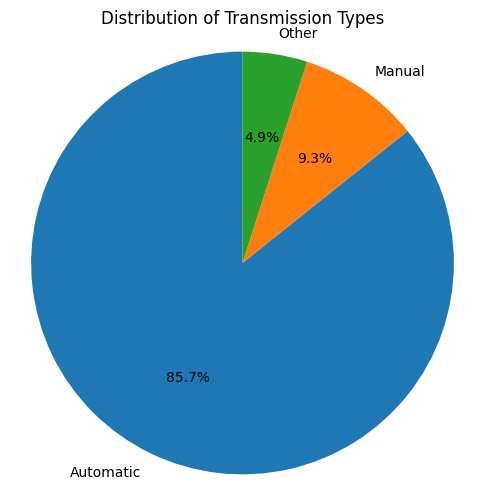

In [53]:
transmission_counts = df['transmission'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transmission Types')
plt.axis('equal')
plt.show()

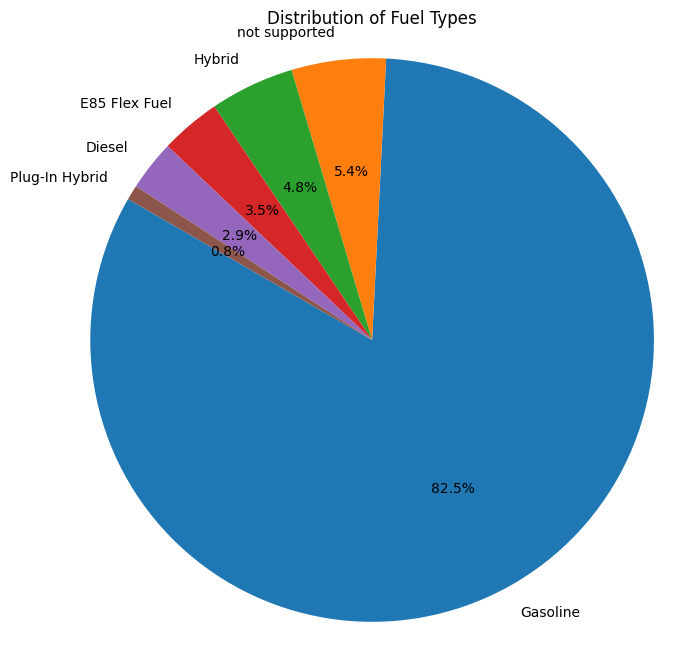

In [54]:
fueltype_counts =df["fuel_type"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fueltype_counts,labels=fueltype_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Distribution of Fuel Types')
plt.axis('equal')
plt.show()

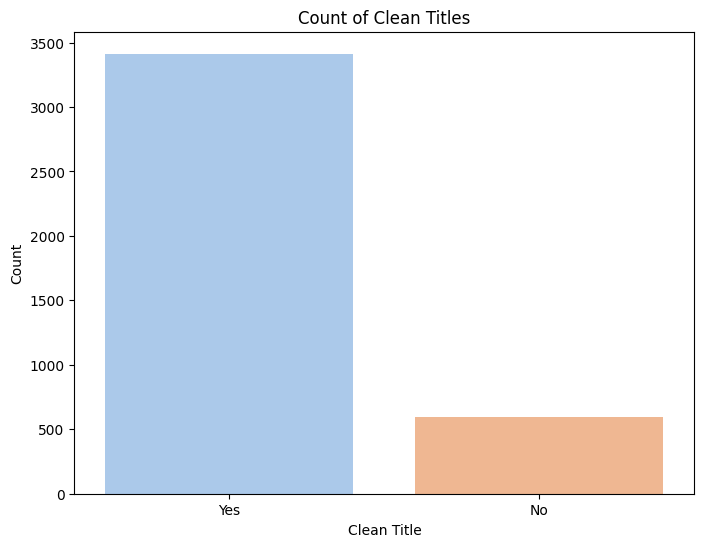

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='clean_title', palette=sns.color_palette("pastel"))
plt.title('Count of Clean Titles')
plt.xlabel('Clean Title')
plt.ylabel('Count')
plt.show()

In [56]:
brand_counts=df["brand"].value_counts()

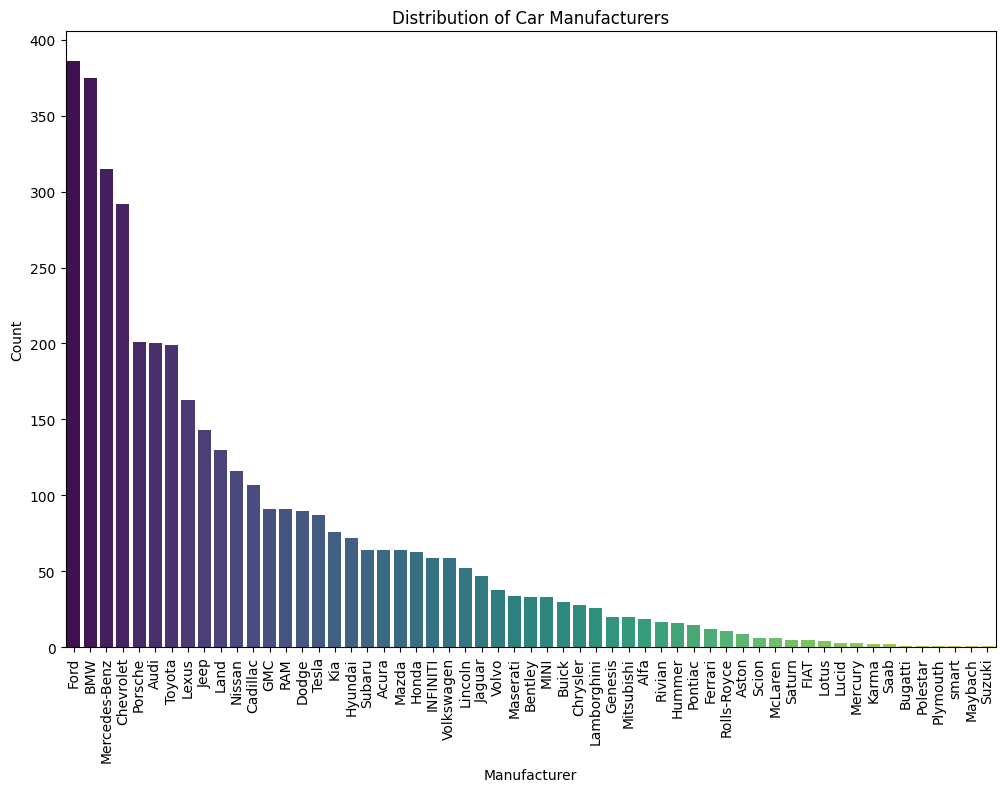

In [57]:
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

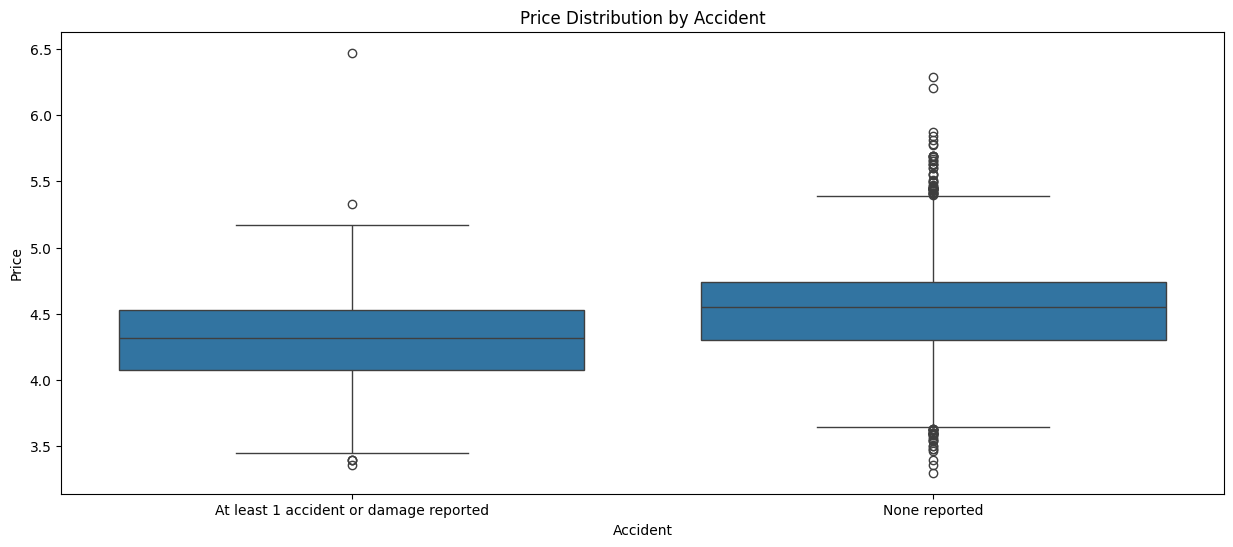

In [58]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df,x="accident",y="price")
plt.title("Price Distribution by Accident")
plt.xlabel("Accident")
plt.ylabel("Price")

plt.show()

In [59]:
df["Age"].unique()

array([13,  5,  4, 11, 10,  9, 25,  6,  7, 23,  8,  3, 26, 20, 15, 14, 19,
       12, 21, 17, 16, 22, 18, 29, 27, 33, 24, 28,  2, 30, 52, 34, 31, 32])

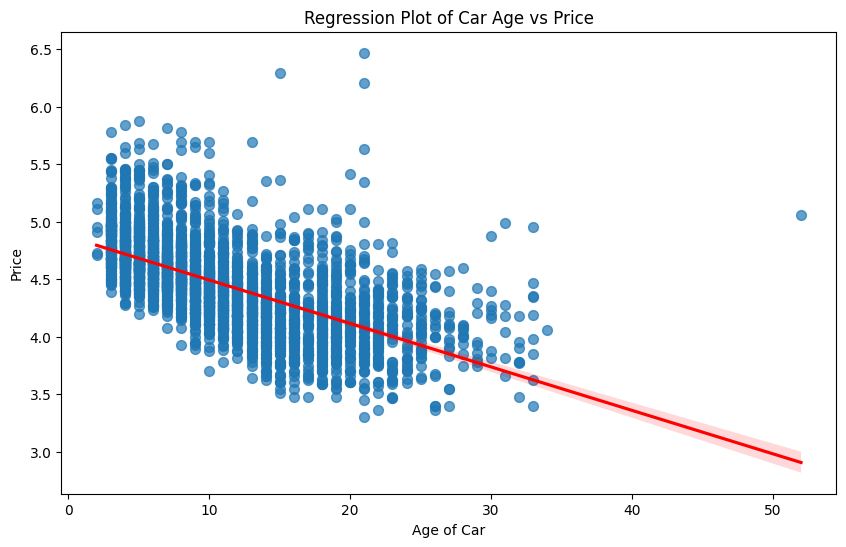

In [60]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='price', scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
plt.title('Regression Plot of Car Age vs Price')
plt.xlabel('Age of Car')
plt.ylabel('Price')
plt.show()

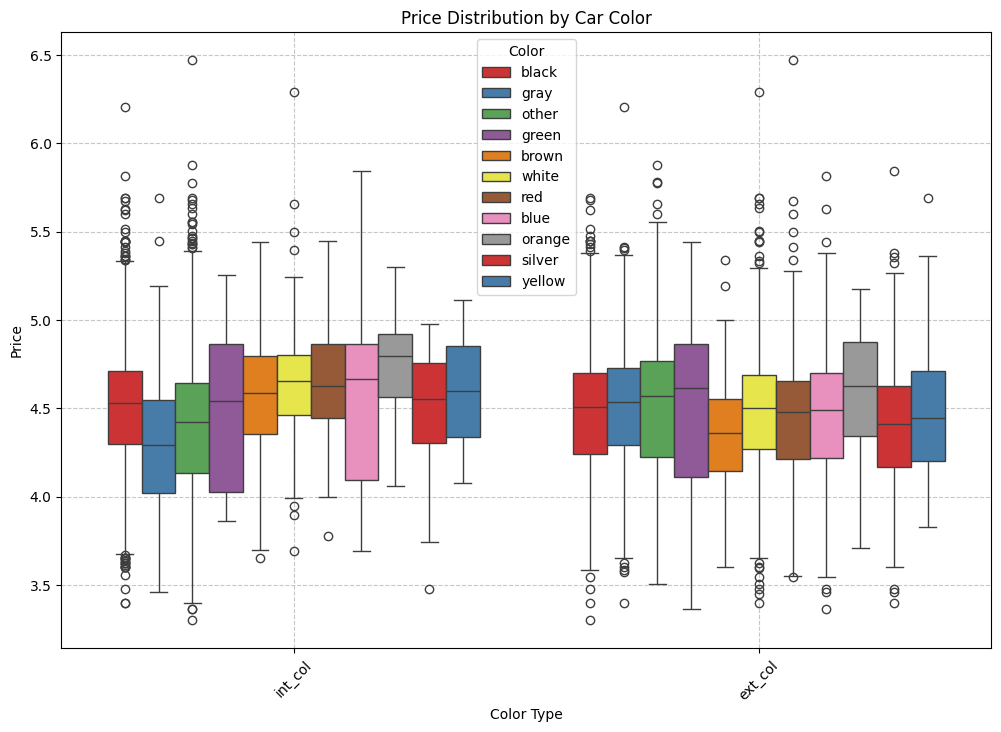

In [61]:

df_melted = df.melt(id_vars=['price'], value_vars=['int_col', 'ext_col'], var_name='color_type', value_name='color')
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='color_type', y='price', hue='color', palette='Set1')

plt.title('Price Distribution by Car Color')
plt.xlabel('Color Type')
plt.ylabel('Price')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Color')
plt.show()


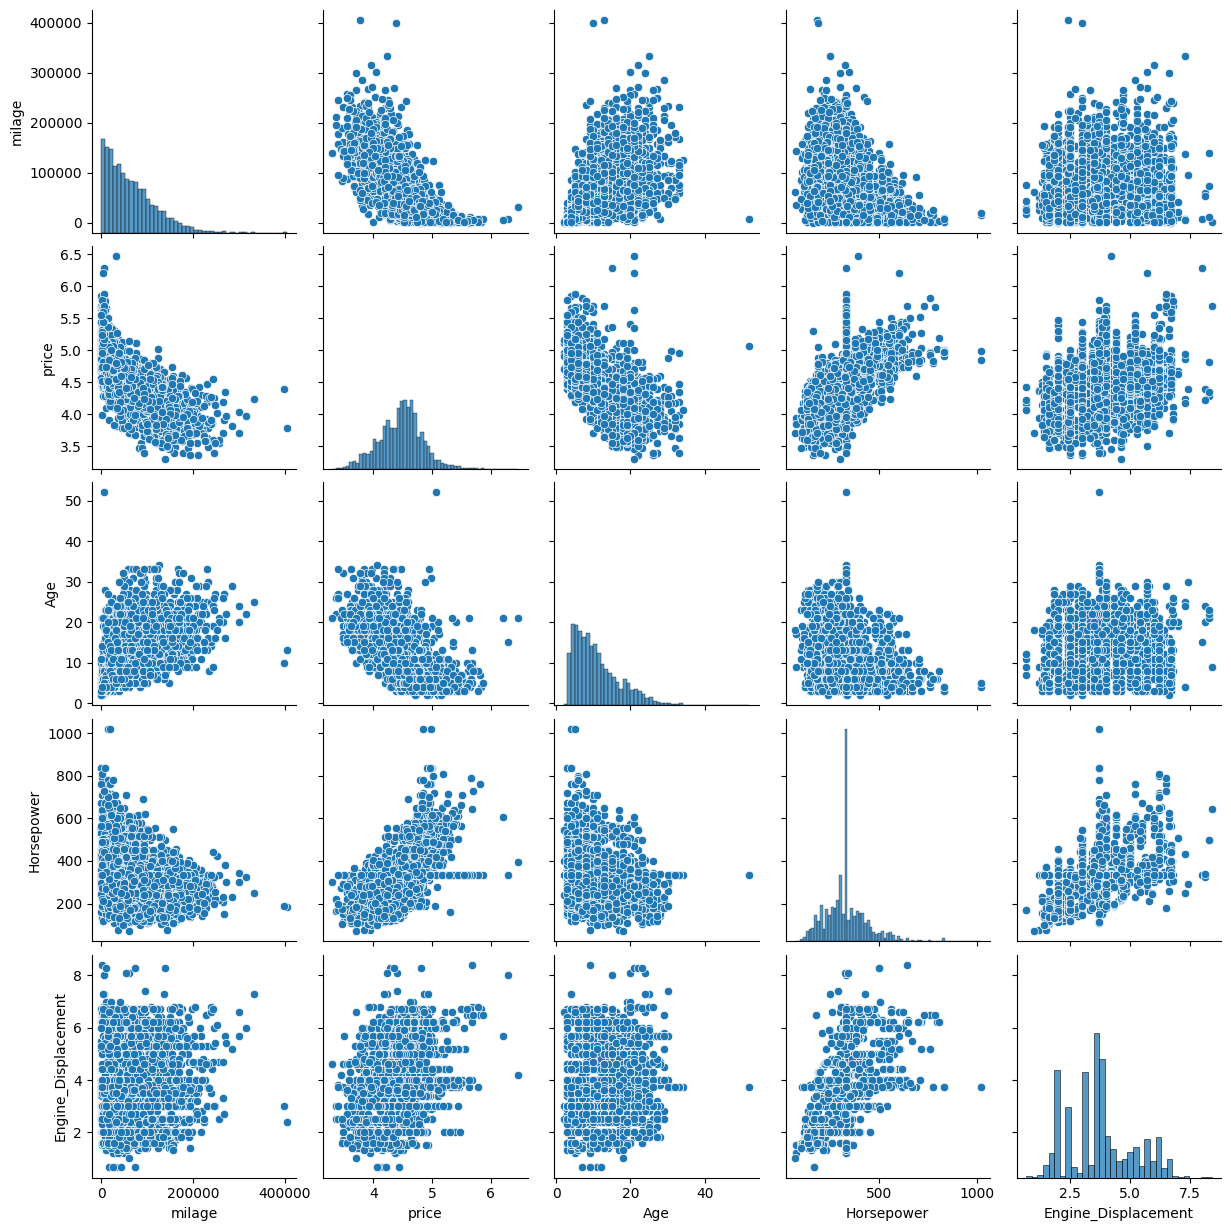

In [62]:
sns.pairplot(df)
plt.show()

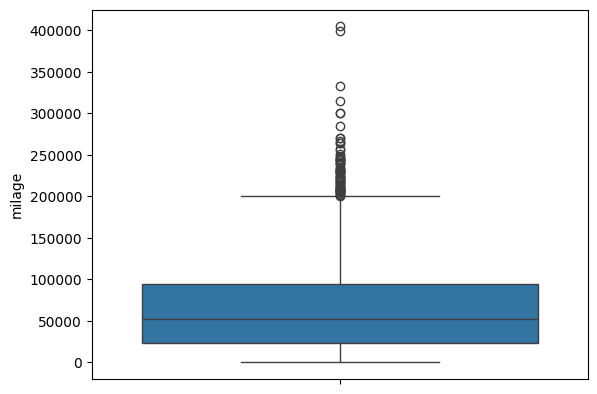

In [63]:
sns.boxplot(df["milage"])
plt.show()

In [64]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])


In [65]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])

In [66]:
Q1 = df['milage'].quantile(0.25)
Q3 = df['milage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['milage'] = np.where(df['milage'] < lower_bound, lower_bound, df['milage'])
df['milage'] = np.where(df['milage'] > upper_bound, upper_bound, df['milage'])

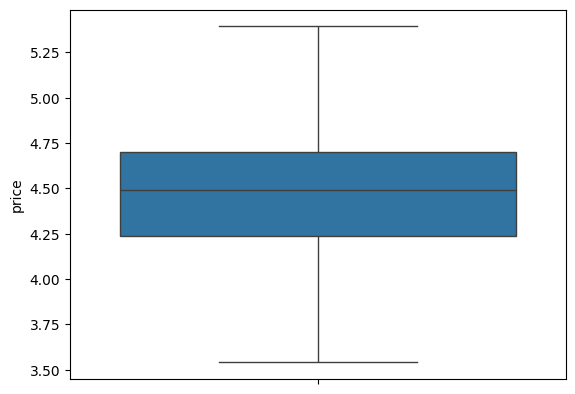

In [67]:
sns.boxplot(df["price"])
plt.show()

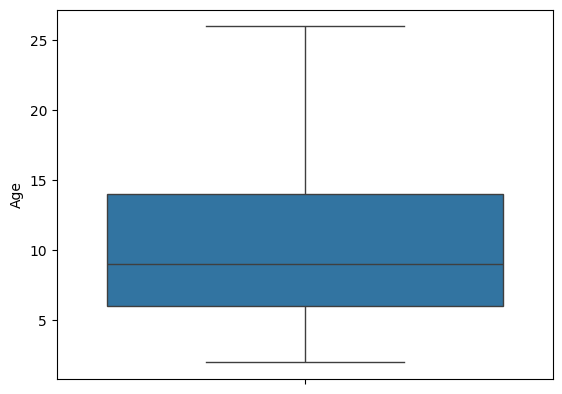

In [68]:
sns.boxplot(df["Age"])
plt.show()

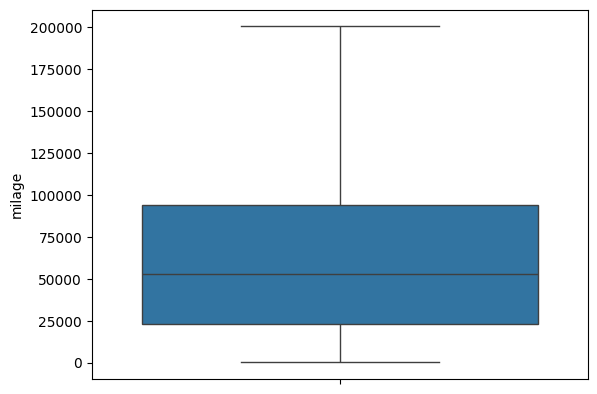

In [69]:
sns.boxplot(df["milage"])
plt.show()

In [70]:
Q1 = df['Horsepower'].quantile(0.25)
Q3 = df['Horsepower'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Horsepower'] = np.where(df['Horsepower'] < lower_bound, lower_bound, df['Horsepower'])
df['Horsepower'] = np.where(df['Horsepower'] > upper_bound, upper_bound, df['Horsepower'])

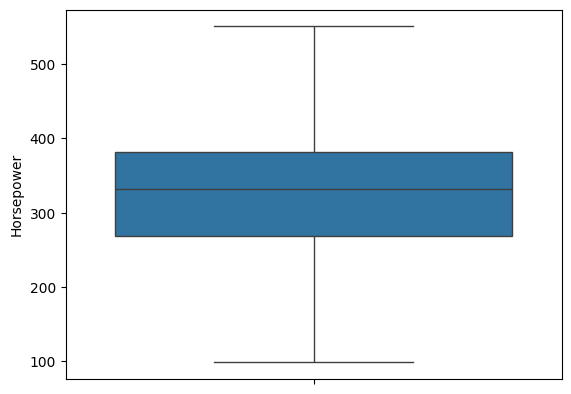

In [71]:
sns.boxplot(df["Horsepower"])
plt.show()

In [72]:
Q1 = df['Engine_Displacement'].quantile(0.25)
Q3 = df['Engine_Displacement'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Engine_Displacement'] = np.where(df['Engine_Displacement'] < lower_bound, lower_bound, df['Engine_Displacement'])
df['Engine_Displacement'] = np.where(df['Engine_Displacement'] > upper_bound, upper_bound, df['Engine_Displacement'])

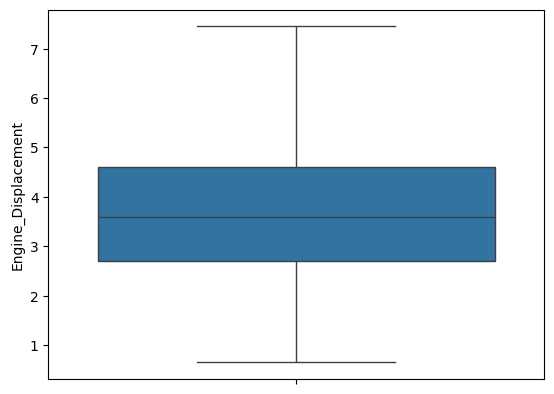

In [73]:
sns.boxplot(df["Engine_Displacement"])
plt.show()

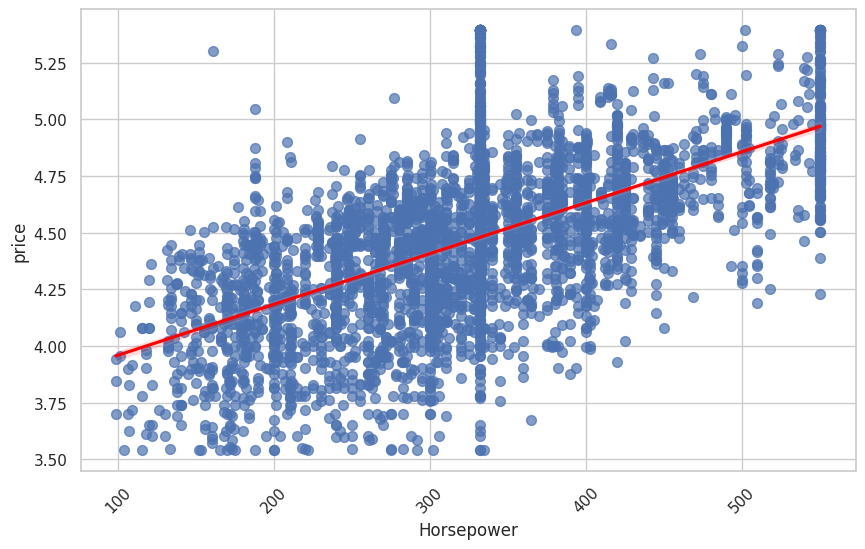

In [74]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Horsepower', y = 'price', data =df,scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
plt.xticks(rotation=45)
plt.show()

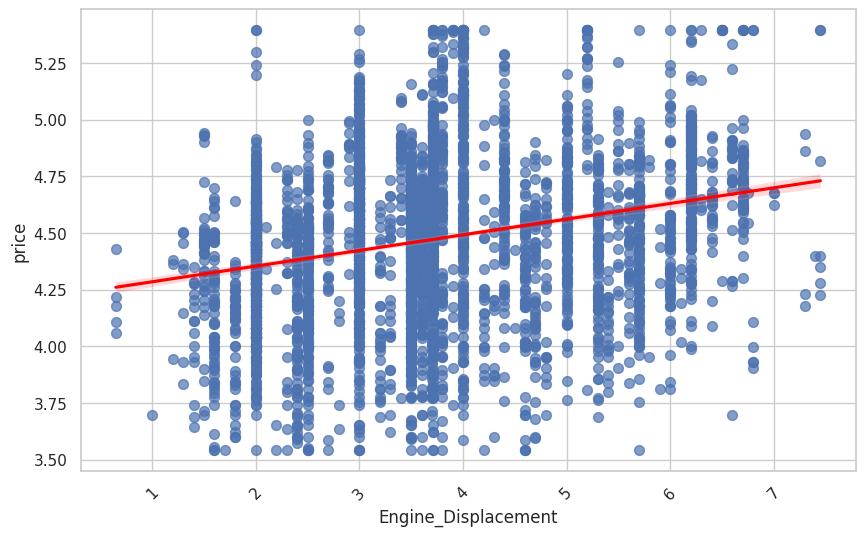

In [75]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Engine_Displacement', y = 'price', data =df,scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
plt.xticks(rotation=45)
plt.show()

In [76]:
df.corr(numeric_only=True)

,milage,price,Age,Horsepower,Engine_Displacement
milage,1.000000,-0.729271,0.638573,-0.321750,0.050224
price,-0.729271,1.000000,-0.651029,0.608604,0.258752
Age,0.638573,-0.651029,1.000000,-0.271184,0.093969
Horsepower,-0.321750,0.608604,-0.271184,1.000000,0.568877
Engine_Displacement,0.050224,0.258752,0.093969,0.568877,1.000000


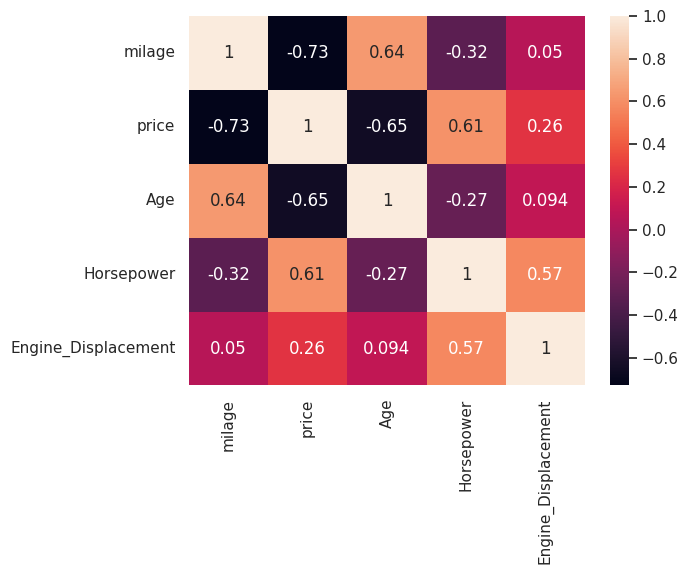

In [77]:

sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Encode categorical columns (added accident & clean_title here)
categorical_cols = ["brand", "fuel_type", "transmission", "ext_col", "int_col",
                    "accident", "clean_title"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 2. Features (X) and Target (y)
X = df_encoded.drop("price", axis=1)   # 👈 change 'Price' if your target column is named differently
y = df_encoded["price"]

# 3. Train/Validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 5. Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)

# 6. Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 7. Predict on validation
y_valid_pred = model.predict(X_valid_scaled)

# 8. Evaluate
mse = mean_squared_error(y_valid, y_valid_pred)
r2 = r2_score(y_valid, y_valid_pred)

print(f"✅ Mean Squared Error: {mse:.2f}")
print(f"✅ R-squared: {r2:.4f}")


✅ Mean Squared Error: 0.03
✅ R-squared: 0.8101


In [79]:
# Use the same column names from X_valid automatically
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)


In [80]:
X_valid_scaled.head()

,milage,Age,Horsepower,Engine_Displacement,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,...,int_col_gray,int_col_green,int_col_orange,int_col_other,int_col_red,int_col_silver,int_col_white,int_col_yellow,accident_None reported,clean_title_Yes
0,-0.265008,-0.408374,-0.712150,-0.156333,-0.073001,-0.039516,-0.218396,-0.32712,-0.09385,0.0,...,2.786090,-0.046771,-0.073001,-0.528894,-0.186681,-0.063798,-0.186681,-0.017661,-1.757999,0.414392
1,0.005228,1.995292,-1.528697,-0.230592,-0.073001,-0.039516,-0.218396,-0.32712,-0.09385,0.0,...,-0.358926,-0.046771,-0.073001,1.890739,-0.186681,-0.063798,-0.186681,-0.017661,0.568828,0.414392
2,0.435349,-0.236683,0.206466,2.219975,-0.073001,-0.039516,-0.218396,-0.32712,-0.09385,0.0,...,2.786090,-0.046771,-0.073001,-0.528894,-0.186681,-0.063798,-0.186681,-0.017661,-1.757999,0.414392
3,-0.786334,0.450078,1.012806,0.660523,-0.073001,-0.039516,-0.218396,-0.32712,-0.09385,0.0,...,-0.358926,-0.046771,-0.073001,-0.528894,5.356720,-0.063798,-0.186681,-0.017661,-1.757999,0.414392
4,-0.915030,-0.408374,2.002870,1.106081,-0.073001,-0.039516,-0.218396,-0.32712,-0.09385,0.0,...,-0.358926,-0.046771,-0.073001,-0.528894,-0.186681,-0.063798,-0.186681,-0.017661,-1.757999,0.414392


In [81]:
pip install xgboost


In [82]:
from xgboost import XGBRegressor

# 1. Initialize model
model1 = XGBRegressor()

# 2. Train on scaled training data
model1.fit(X_train_scaled, y_train)

# 3. Predict on validation set
y_valid_pred_xgb = model1.predict(X_valid_scaled)

# 4. Evaluate
mse_xgb = mean_squared_error(y_valid, y_valid_pred_xgb)
r2_xgb = r2_score(y_valid, y_valid_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")


XGBoost - Mean Squared Error: 0.017801448298466745
XGBoost - R-squared: 0.8655629891873688


In [83]:
model1 = XGBRegressor()
model1.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [84]:
y_pred = model1.predict(X_valid_scaled)

In [85]:
r2_score(y_valid, y_pred)

0.8655629891873688

In [86]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor()

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,          # only try 20 random combos
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best Score: -0.01563654250353197


In [87]:
best_mse = -random_search.best_score_
print(f"Best MSE: {best_mse}")


Best MSE: 0.01563654250353197


In [88]:
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 5,
    'n_estimators': 200,
    'subsample': 0.8
}

model = XGBRegressor(**best_params)
model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [89]:

y_train_pred = model.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Train Mean Squared Error: {mse_train}')
print(f'Train R-squared: {r2_train}')



Train Mean Squared Error: 0.007538895300564705
Train R-squared: 0.9415070456001426


In [90]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# 1. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define model + params
xgb = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

# 4. Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)   # <--- This must run first!

# 5. Get best model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 6. Train final model with best params
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)

# 7. Evaluate
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: -0.016096542282785224
Test Mean Squared Error: 0.016491467429136618
Test R-squared: 0.8754559995392087


In [93]:
!ls /content


AutoML.Used.Car.Valuation  sample_data	used_cars.csv
